# Comprehensive Analysis: Regression & Logistic Regression

This notebook performs two tasks with short variable names:

1. **Regression Analysis** using an Advertising dataset:
   - Load and explore data.
   - Implement Linear, Ridge, and Lasso regression.
   - Evaluate models with MSE, RMSE, and R².
   - Visualize predictions vs. actual sales.

2. **Logistic Regression Classification** using a filtered Iris dataset:
   - Convert the Iris dataset to a binary classification problem.
   - Train a Logistic Regression model.
   - Evaluate using Accuracy, Confusion Matrix, Classification Report, and ROC Curve with AUC.


#### Part 1: Regression Analysis

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

rs = 42

#### Load and preprocess the advertising dataset

In [19]:
df = pd.read_csv("advertising.csv")

# Basic data exploration
print("Head:\n", df.head())
print("\nTail:\n", df.tail())
print("\nShape:", df.shape)
print("\nInfo:")
df.info()
print("\nStats:\n", df.describe())

# Define features and target using short variable names
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


Head:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Tail:
      Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes

#### Split data: training (80%) and testing (20%)

In [20]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=rs)

lr = LinearRegression()
lr.fit(Xtr, ytr)
yl = lr.predict(Xts)

print("\nLinear Reg Metrics:")
print("MSE:", mean_squared_error(yts, yl))
print("RMSE:", np.sqrt(mean_squared_error(yts, yl)))
print("R²:", r2_score(yts, yl))



Linear Reg Metrics:
MSE: 3.1740973539761033
RMSE: 1.78159966153345
R²: 0.899438024100912


#### Lasso Regression

In [21]:
las = Lasso(alpha=0.4, random_state=rs)
las.fit(Xtr, ytr)
ya = las.predict(Xts)

print("\nLasso Reg Metrics:")
print("Coefs:", las.coef_)
print("MSE:", mean_squared_error(yts, ya))
print("RMSE:", np.sqrt(mean_squared_error(yts, ya)))
print("R²:", r2_score(yts, ya))


Lasso Reg Metrics:
Coefs: [0.04469    0.18765683 0.00222556]
MSE: 3.160502075170457
RMSE: 1.7777800975290665
R²: 0.8998687506814569


#### Plot Actual vs. Predicted for Lasso

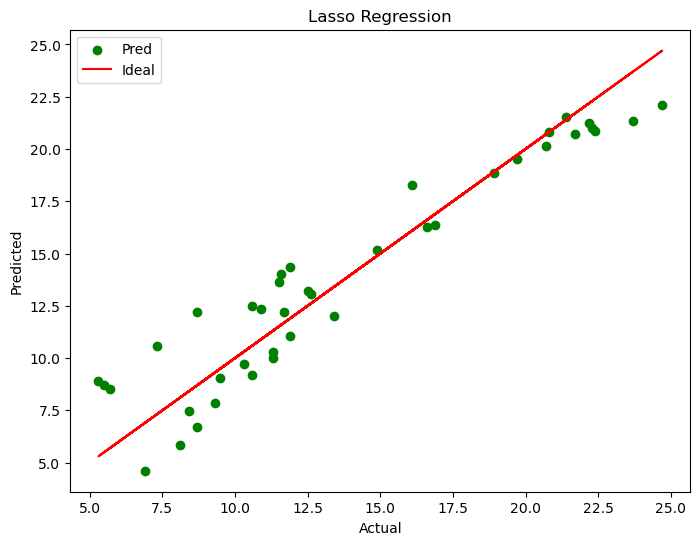

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(yts, ya, color='green', label='Pred')
plt.plot(yts, yts, color='red', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.legend()
plt.show()


# Part 2: Logistic Regression Classification

We'll use the Iris dataset (filtered to a binary problem) to:
- Train a Logistic Regression model.
- Evaluate with Accuracy, Confusion Matrix, and Classification Report.
- Plot an ROC Curve and compute AUC.



#### Load and preprocess Iris dataset

In [23]:
iris = load_iris()
Xi, yi = iris.data, iris.target

# Filter out class '2' to make it binary
Xb = Xi[yi != 2]
yb = yi[yi != 2]

#### Split binary data: training (80%) and testing (20%)

In [24]:
Xtr2, Xts2, ytr2, yts2 = train_test_split(Xb, yb, test_size=0.2, random_state=rs)


#### Train and run Logistic Regression

In [25]:
lg = LogisticRegression(random_state=rs)
lg.fit(Xtr2, ytr2)

# Make predictions
yp = lg.predict(Xts2)

print("\nLogistic Reg Metrics:")
print("Preds:", yp)
print("Accuracy:", accuracy_score(yts2, yp))
print("Confusion Matrix:\n", confusion_matrix(yts2, yp))
print("Report:\n", classification_report(yts2, yp))



Logistic Reg Metrics:
Preds: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### ROC Curve & AUC for Logistic Regression

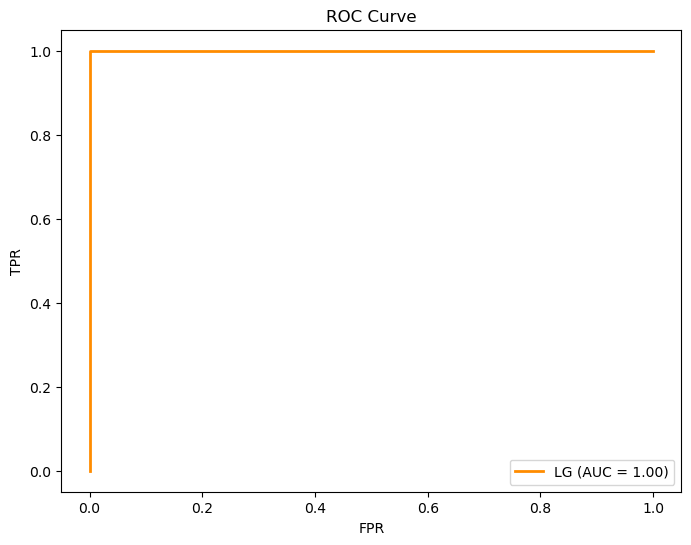

In [26]:
ypb = lg.predict_proba(Xts2)[:, 1]
fpr, tpr, thr = roc_curve(yts2, ypb)
auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'LG (AUC = {auc_val:.2f})', color='darkorange', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
